In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale, normalize ,StandardScaler

In [2]:
iris = datasets.load_iris()
dir(iris)
print (iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Now trying clustering with k=5;

In [5]:
kmeans_5 = KMeans(n_clusters = 5)
y_kmeans5 = kmeans_5.fit_predict(iris.data)
print (y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 3 2 0 3 3 0 4 0 3 0 3
 3 3 2 3 3 3 0 0 2 3 2 0 2 3 0 2 2 3 0 0 0 3 2 2 0 3 3 2 3 3 3 2 3 3 3 2 3
 3 2]


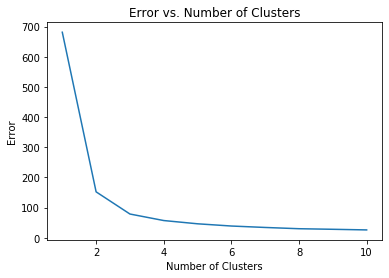

In [6]:
Error= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(iris.data)
    kmeans = kmeans.fit(iris.data) 
    Error.append(kmeans.inertia_)
plt.plot(range(1,11), Error)
plt.title("Error vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Error")
plt.show()

# As we can clearly see from this graph, that between 2 and 4, we started noticing a linear change in error with respect to the increase in number of clusters so we will basically chose number of clusters to be 3.

In [7]:
# Now doing Kmeans clustering for k = 3;
kmeans = KMeans(n_clusters = 3)
y_kmeans3 = kmeans.fit_predict(iris.data)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(iris.target,y_kmeans3))
confusion_matrix(iris.target,y_kmeans3)

0.24


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [9]:
clustering = KMeans(n_clusters=3, random_state=10)
clustering.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [10]:
y= clustering.labels_

In [11]:
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
y = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)

In [13]:
print(accuracy_score(iris.target,y))
confusion_matrix(iris.target,y)

0.8933333333333333


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30)

In [15]:
# Doing training for traing set first
kmeans = KMeans(n_clusters = 3)
y_trainpredicted = kmeans.fit_predict(X_train)
print(y_trainpredicted)

[2 2 2 1 0 0 2 1 1 1 1 1 1 0 1 2 2 1 2 1 0 0 1 1 2 1 1 1 0 1 1 0 1 2 0 2 1
 1 1 1 0 0 2 2 1 1 1 0 0 1 0 1 2 1 0 1 0 2 0 0 1 1 1 0 0 1 0 1 0 0 1 2 0 2
 2 2 0 1 1 1 2 1 0 0 0 2 0 1 1 2 0 1 1 2 0 0 1 1 0 0 2 1 2 2 2]


In [16]:
# Now doing for Validation set of 30%
kmeans = KMeans(n_clusters = 3)
y_testpredicted = kmeans.fit_predict(X_test)
print(y_testpredicted)

[0 0 0 1 1 1 0 1 0 2 2 2 1 2 0 0 2 0 2 1 2 2 0 2 0 1 1 2 1 1 0 2 0 0 2 1 0
 2 2 2 1 2 2 0 0]


# Printing accuracy for training set
print(accuracy_score(y_train,y_trainpredicted))
confusion_matrix(y_train,y_trainpredicted)

In [17]:
print(accuracy_score(y_train,y_trainpredicted))
confusion_matrix(y_train,y_trainpredicted)

0.8857142857142857


array([[33,  0,  0],
       [ 0, 35,  1],
       [ 0, 11, 25]], dtype=int64)

# Printing accuracy for validation now

In [18]:

print(accuracy_score(y_test,y_testpredicted))
confusion_matrix(y_test,y_testpredicted)

0.022222222222222223


array([[ 0,  0, 17],
       [13,  1,  0],
       [ 3, 11,  0]], dtype=int64)

Text(0.5, 1.0, 'This is Actual Flower Cluster')

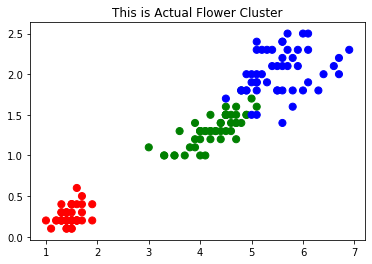

In [19]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y1 = pd.DataFrame(iris.target)
y1.columns =['Targets']
color_theme = np.array(['red','green','blue'])

plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width, c= color_theme[iris.target],s=50)
plt.title ("This is Actual Flower Cluster")


Text(0.5, 1.0, 'This is by Kmeans Cluster')

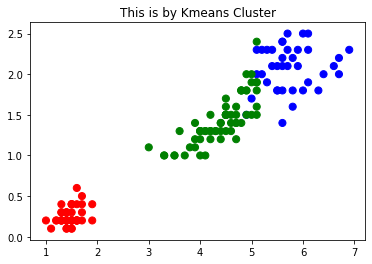

In [20]:
plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width, c= color_theme[y],s=50)
plt.title ("This is by Kmeans Cluster")
